In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

<h1>Creating custom dataset and visualizing it</h1>

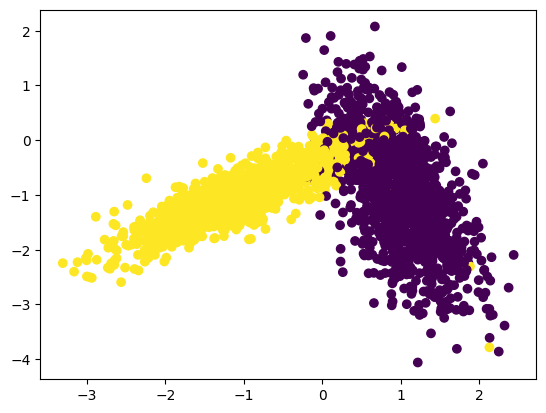

In [2]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
def get_n_bins(n,X_t):
    #Returns required grouping of the indices of the input data into n bins
    size=len(X_t)/n
    l_i=0
    out=[]
    while l_i<len(X_t):
        out.append(list(range(int(l_i),int(l_i+size))))
        l_i+=size
    return out
    
def RandomSearchCV(X_t,y_t,classifier,param_range,folds):
    #Initializing the seed value to maintain consistency in results upon re-run
    random.seed(45) 
    
    #Generating 10 unique values to be used as the number of neighbors
    params=sorted(random.sample(range(param_range[0],param_range[1]),10))
    
    #Converting the number of neighbors to integer values.
    train_scores=[]
    cv_scores=[]
    groups=get_n_bins(folds,X_t)
    for k in tqdm(params):
        train_scores_fold=[]
        cv_scores_fold=[]
        for i in range(folds):
            #Getting the required group of indices for cross validation and the remaining ones for training
            cv_ind=groups[i]
            train_ind=[i for x in list(filter(lambda x:x!=cv_ind,groups)) for i in x]
            
            #Selecting the data based on the randomly sampled train and cross validation indices
            X_train=X_t[train_ind]
            Y_train=y_t[train_ind]
            X_cv=X_t[cv_ind]
            Y_cv=y_t[cv_ind]
            
            #Fitting the values into out classifier
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            
            #Predicting the CV classes and then calculating their accuracy
            pred_cv=classifier.predict(X_cv)
            cv_scores_fold.append(accuracy_score(Y_cv, pred_cv))
            
            #Predicting the Train classes and then calculating their accuracy
            pred_train=classifier.predict(X_train)
            train_scores_fold.append(accuracy_score(Y_train, pred_train))
        
        #Averaging out the prediction scores calculated during cross validation and appaending them
        train_scores.append(np.mean(np.array(train_scores_fold)))
        cv_scores.append(np.mean(np.array(cv_scores_fold)))
    return train_scores,cv_scores,params

100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.13it/s]

Number of nearest neighbors:  [1, 3, 8, 9, 10, 11, 14, 16, 20, 24]


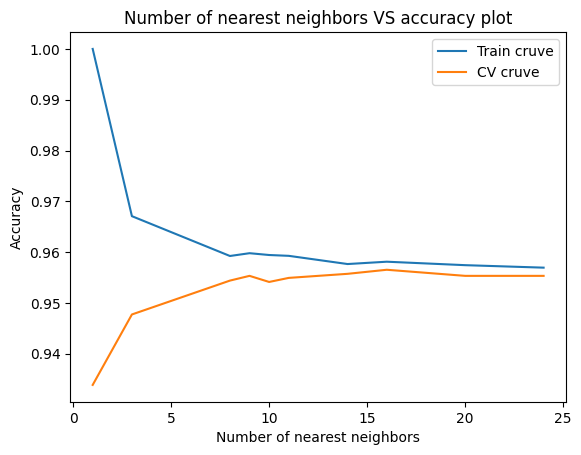

In [4]:
n = KNeighborsClassifier()

params_range = (1,25) #Pick a range for the parameters as desired
folds = 10 #Pick the number of folds as desired

trainscores,cvscores,params = RandomSearchCV(X_train, y_train, n, params_range, folds)

#Printing the list of the number of nearest neighbors which the algorithm takes into consideration 
print('Number of nearest neighbors: ',params)
plt.plot(params,trainscores, label='Train cruve')
plt.plot(params,cvscores, label='CV cruve')
plt.title('Number of nearest neighbors VS accuracy plot')
plt.legend()
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')
plt.rcParams['figure.figsize']=(15,20)
plt.show()

From the above graph we can conclude that Number of nearest neighbors=24 yields us the best accuracy

In [5]:
def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

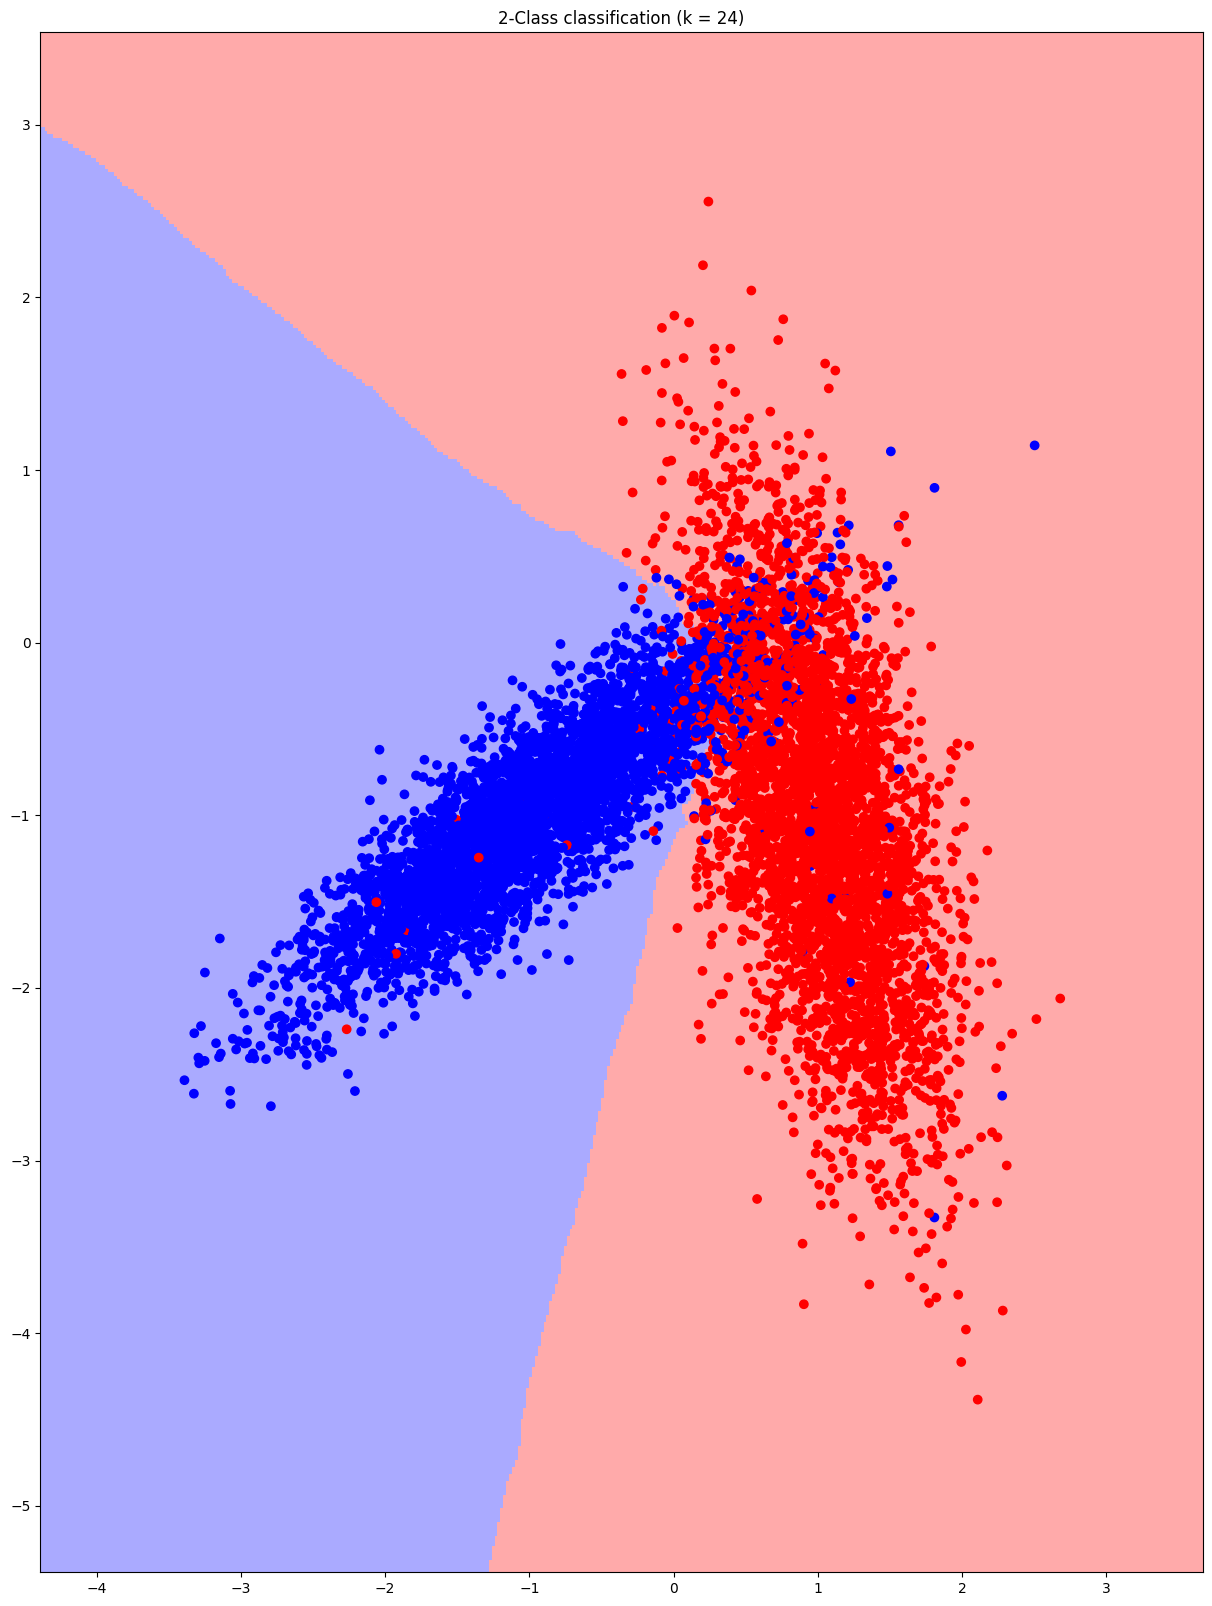

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

Our model has an accuracy of:  0.97


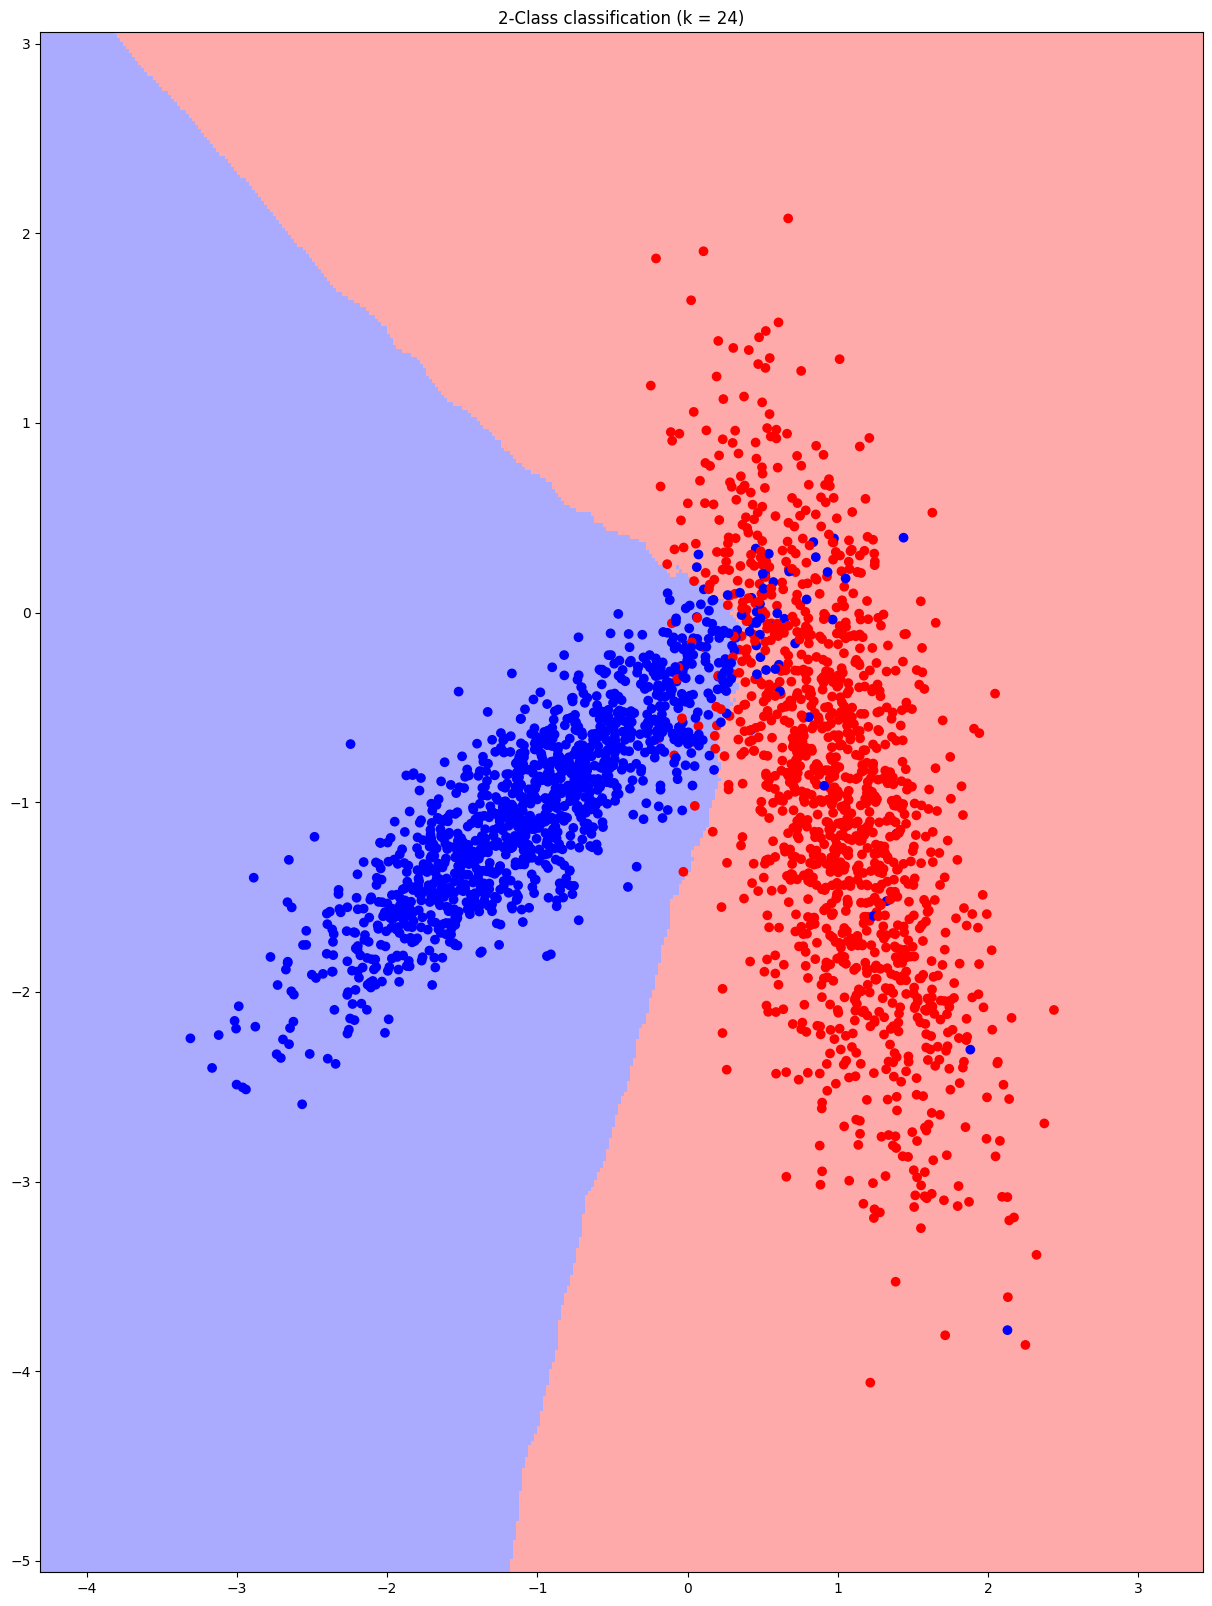

In [7]:
#Plotting the decision boundary on the test set
neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(X_test, y_test)
pred=neigh.predict(X_test)
print('Our model has an accuracy of: ',accuracy_score(y_test,pred))
plot_decision_boundary(X_test[:, 0], X_test[:, 1], y_test, neigh)

Our decision boundry does a pretty descent job of seperating the points in the test data set and has an accuracy score of 97% on unseen data